<a href="https://colab.research.google.com/github/Jagruthianaga/LGMVIP-DataScience/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2 Prediction using Decision Tree  Algorithm**

**Installing all the packages...**

In [43]:
!pip install sklearn

**Importing the packages for Visualizing the data**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

**Importing for the packages for Building Model**

In [45]:
#For Building Model
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Loading the dataset**

In [47]:
data=pd.read_csv("Iris.csv")

**To view first 5 rows of data**

In [48]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**To view last 5 rows of data**

In [49]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**To view information about data**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**To Describe about data**

In [51]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**To know the no of Columns and rows**

In [52]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 5)

**To view the count of each species in the data**

In [54]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Data Wrangling**

In [55]:
data = data.drop(['Id'], axis =1)

**Replacing species names with encoded values**

In [56]:
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data['Species'] = data['Species'].astype('category').cat.codes

**After modification final data is**

In [57]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


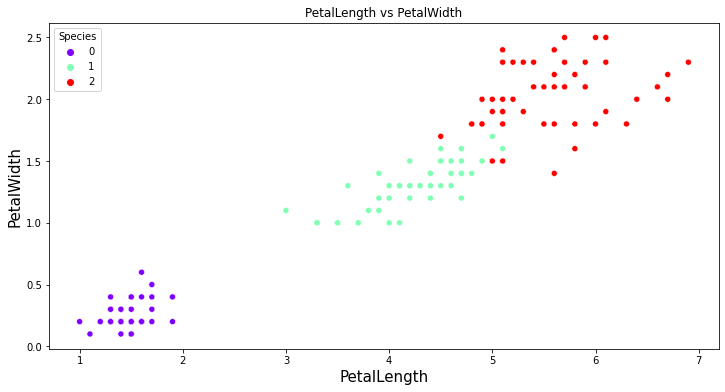

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["PetalLengthCm"] ,data['PetalWidthCm'],hue=data['Species'],palette="rainbow")
plt.title("PetalLength vs PetalWidth")
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("PetalWidth",fontsize=15)
plt.show()

**Data Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


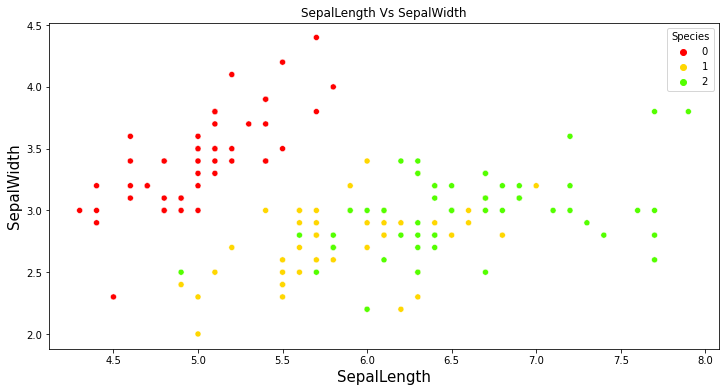

In [59]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLength Vs SepalWidth")
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.show()

**Checking Correlation**

[]

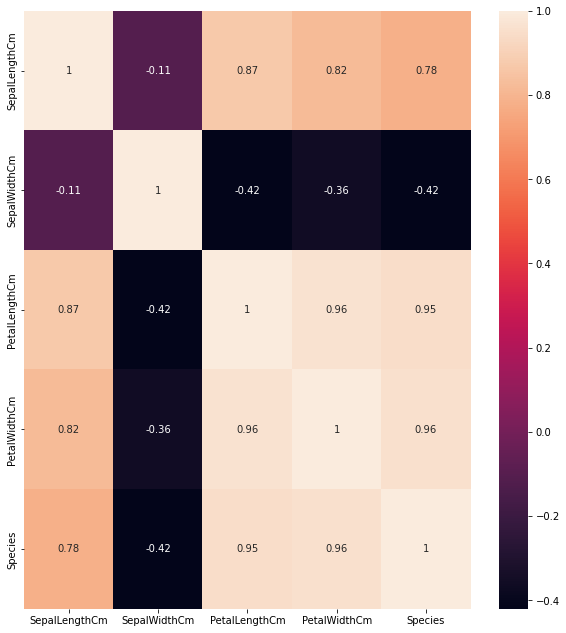

In [60]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

**Model Building**

In [61]:
x = data.drop(['Species'], axis =1)
y = data['Species']

**Splitting the data for training and testing**

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [75]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Predicting the values**

In [65]:
y_pred = model.predict(x_test)

**Finding Accuracy Score**

In [66]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score is  \t",accuracy*100)

Accuracy Score is  	 91.11111111111111


**Confusion Matrix**

In [67]:
matrix=confusion_matrix(y_test,y_pred)
print('confusion matrix \n',matrix)

confusion matrix 
 [[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


**Plotting the Tree**

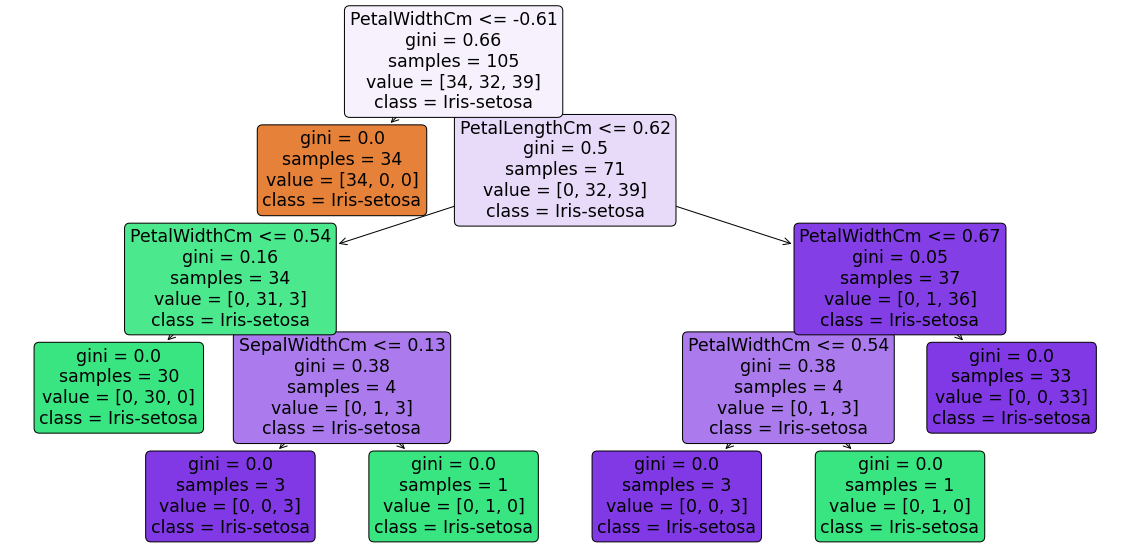

In [73]:
plt.figure(figsize=(20,10))
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
tree.plot_tree(model,feature_names =feature_names,precision=2,rounded=True,filled=True,class_names=target.values);

**Predicting class for user input**

In [69]:
sl=float(input("Enter Sepal Length : "))
sw=float(input("Enter Sepal Width : "))
pl=float(input("Enter Petal Length : "))
pw=float(input("Enter Petal width : "))
enteredData=[[sl,sw,pl,pw]]
result=model.predict(enteredData)
r={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
print("Predicted Class is",r[result[0]])

Enter Sepal Length : 18
Enter Sepal Width : 45
Enter Petal Length : 23
Enter Petal width : 12
Predicted Class is Iris-virginica
